In [1]:
import pandas as pd
import numpy as np
def sola_nmae(answer_df, submission_df):

    submission = submission_df[submission_df['time'].isin(answer_df['time'])]
    submission.index = range(submission.shape[0])
 
    # 시간대별 총 발전량
    sum_submission = submission.iloc[:,1:].sum(axis=1)
    sum_answer = answer_df.iloc[:,1:].sum(axis=1)

    # 발전소 발전용량
    capacity = {
        'dangjin_floating':1000, # 당진수상태양광 발전용량
        'dangjin_warehouse':700, # 당진자재창고태양광 발전용량
        'dangjin':1000, # 당진태양광 발전용량
        'ulsan':500 # 울산태양광 발전용량
    }

    # 총 발전용량
    total_capacity = np.sum(list(capacity.values()))

    # 총 발전용량 절대오차
    absolute_error = (sum_answer - sum_submission).abs()

    # 발전용량으로 정규화
    absolute_error /= total_capacity
    
    # 총 발전용량의 10% 이상 발전한 데이터 인덱스 추출
    target_idx = sum_answer[sum_answer>=total_capacity*0.1].index

    # NMAE(%)
    nmae = 100 * absolute_error[target_idx].mean()
    
    return nmae

In [2]:
import pandas as pd
from glob import glob
from PIL import Image

In [3]:
path = 'data/'
files = sorted(glob(path+'*.csv'))
files

['data/dangjin_fcst_data.csv',
 'data/dangjin_obs_data.csv',
 'data/energy.csv',
 'data/sample_submission.csv',
 'data/site_info.csv',
 'data/ulsan_fcst_data.csv',
 'data/ulsan_obs_data.csv']

In [4]:
dangjin_fcst_data = pd.read_csv(files[0])
dangjin_obs_data = pd.read_csv(files[1])
energy = pd.read_csv(files[2])
sample_submission = pd.read_csv(files[3])
site_info = pd.read_csv(files[4])
ulsan_fcst_data = pd.read_csv(files[5])
ulsan_obs_data = pd.read_csv(files[6])

In [5]:
site_info.head()

,Id,Capacity,Address,InstallationAngle,IncidentAngle,Latitude,Longitude
0,당진수상태양광,1.0,충남 당진시 석문면 교로길 30,30.0,30.0,37.050753,126.510299
1,당진자재창고태양광,0.7,충남 당진시 석문면 교로길 30,30.0,30.0,37.050753,126.510299
2,당진태양광,1.0,충남 당진시 석문면 교로길 30,30.0,30.0,37.050753,126.510299
3,울산태양광,0.5,울산광역시 남구 용잠로 623,20.0,20.0,35.477651,129.380778


In [18]:
energy.head(50)

,time,dangjin_floating,dangjin_warehouse,dangjin,ulsan
0,2018-03-01 1:00:00,0.0,0.0,0,0
1,2018-03-01 2:00:00,0.0,0.0,0,0
2,2018-03-01 3:00:00,0.0,0.0,0,0
3,2018-03-01 4:00:00,0.0,0.0,0,0
4,2018-03-01 5:00:00,0.0,0.0,0,0
5,2018-03-01 6:00:00,0.0,0.0,0,0
6,2018-03-01 7:00:00,0.0,0.0,0,0
7,2018-03-01 8:00:00,0.0,0.0,0,4
8,2018-03-01 9:00:00,36.0,33.0,37,35
9,2018-03-01 10:00:00,313.0,209.0,318,71


In [19]:
dangjin_fcst_data.head(50)

,Forecast time,forecast,Temperature,Humidity,WindSpeed,WindDirection,Cloud,forecast_new
0,2018-03-01 11:00:00,4.0,0.0,60.0,7.3,309.0,2.0,2018-03-01 15:00:00
1,2018-03-01 11:00:00,7.0,-2.0,60.0,7.1,314.0,1.0,2018-03-01 18:00:00
2,2018-03-01 11:00:00,10.0,-2.0,60.0,6.7,323.0,1.0,2018-03-01 21:00:00
3,2018-03-01 11:00:00,13.0,-2.0,55.0,6.7,336.0,1.0,2018-03-02 00:00:00
4,2018-03-01 11:00:00,16.0,-4.0,55.0,5.5,339.0,1.0,2018-03-02 03:00:00
5,2018-03-01 11:00:00,19.0,-5.0,60.0,4.3,344.0,1.0,2018-03-02 06:00:00
6,2018-03-01 11:00:00,22.0,-2.0,55.0,2.0,345.0,1.0,2018-03-02 09:00:00
7,2018-03-01 11:00:00,25.0,1.0,45.0,0.8,256.0,1.0,2018-03-02 12:00:00
8,2018-03-01 11:00:00,28.0,3.0,50.0,2.3,270.0,1.0,2018-03-02 15:00:00
9,2018-03-01 11:00:00,31.0,1.0,55.0,1.9,264.0,1.0,2018-03-02 18:00:00


In [9]:
dangjin_fcst_data["Forecast time"] = pd.to_datetime(dangjin_fcst_data["Forecast time"])
dangjin_fcst_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162208 entries, 0 to 162207
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Forecast time  162208 non-null  datetime64[ns]
 1   forecast       162208 non-null  float64       
 2   Temperature    162208 non-null  float64       
 3   Humidity       162208 non-null  float64       
 4   WindSpeed      162208 non-null  float64       
 5   WindDirection  162208 non-null  float64       
 6   Cloud          162208 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 8.7 MB


In [12]:
from datetime import datetime, timedelta
# dangjin_fcst_data.drop("forecast_new", axis=1, inplace=True)
for i in dangjin_fcst_data.index:
    dangjin_fcst_data.loc[i, "forecast_new"] = dangjin_fcst_data.loc[i, "Forecast time"] + timedelta(hours=dangjin_fcst_data.loc[i, "forecast"])

In [13]:
dangjin_fcst_data.head()

,Forecast time,forecast,Temperature,Humidity,WindSpeed,WindDirection,Cloud,forecast_new
0,2018-03-01 11:00:00,4.0,0.0,60.0,7.3,309.0,2.0,2018-03-01 15:00:00
1,2018-03-01 11:00:00,7.0,-2.0,60.0,7.1,314.0,1.0,2018-03-01 18:00:00
2,2018-03-01 11:00:00,10.0,-2.0,60.0,6.7,323.0,1.0,2018-03-01 21:00:00
3,2018-03-01 11:00:00,13.0,-2.0,55.0,6.7,336.0,1.0,2018-03-02 00:00:00
4,2018-03-01 11:00:00,16.0,-4.0,55.0,5.5,339.0,1.0,2018-03-02 03:00:00


In [14]:
dangjin_obs_data.head()

,지점,지점명,일시,기온(°C),풍속(m/s),풍향(16방위),습도(%),전운량(10분위)
0,129,서산,2018-03-01 00:00,3.1,3.6,340.0,96.0,NaN
1,129,서산,2018-03-01 01:00,2.8,0.7,140.0,97.0,NaN
2,129,서산,2018-03-01 02:00,2.6,3.2,320.0,95.0,NaN
3,129,서산,2018-03-01 03:00,2.0,1.9,230.0,97.0,NaN
4,129,서산,2018-03-01 04:00,2.2,2.1,180.0,97.0,NaN


In [15]:
ulsan_fcst_data.head()

,Forecast time,forecast,Temperature,Humidity,WindSpeed,WindDirection,Cloud
0,2018-03-01 11:00:00,4.0,8.0,20.0,14.0,298.0,2.0
1,2018-03-01 11:00:00,7.0,4.0,20.0,4.3,298.0,2.0
2,2018-03-01 11:00:00,10.0,3.0,30.0,1.9,309.0,2.0
3,2018-03-01 11:00:00,13.0,0.0,40.0,1.5,318.0,2.0
4,2018-03-01 11:00:00,16.0,-1.0,45.0,1.8,308.0,2.0


In [16]:
ulsan_obs_data.head()

,지점,지점명,일시,기온(°C),풍속(m/s),풍향(16방위),습도(%),전운량(10분위)
0,152,울산,2018-03-01 00:00,8.2,3.9,340.0,98.0,10.0
1,152,울산,2018-03-01 01:00,7.0,4.1,320.0,97.0,10.0
2,152,울산,2018-03-01 02:00,6.5,5.9,290.0,80.0,NaN
3,152,울산,2018-03-01 03:00,6.2,4.6,320.0,79.0,3.0
4,152,울산,2018-03-01 04:00,6.7,4.5,320.0,73.0,1.0


In [17]:
energy.head()

,time,dangjin_floating,dangjin_warehouse,dangjin,ulsan
0,2018-03-01 1:00:00,0.0,0.0,0,0
1,2018-03-01 2:00:00,0.0,0.0,0,0
2,2018-03-01 3:00:00,0.0,0.0,0,0
3,2018-03-01 4:00:00,0.0,0.0,0,0
4,2018-03-01 5:00:00,0.0,0.0,0,0


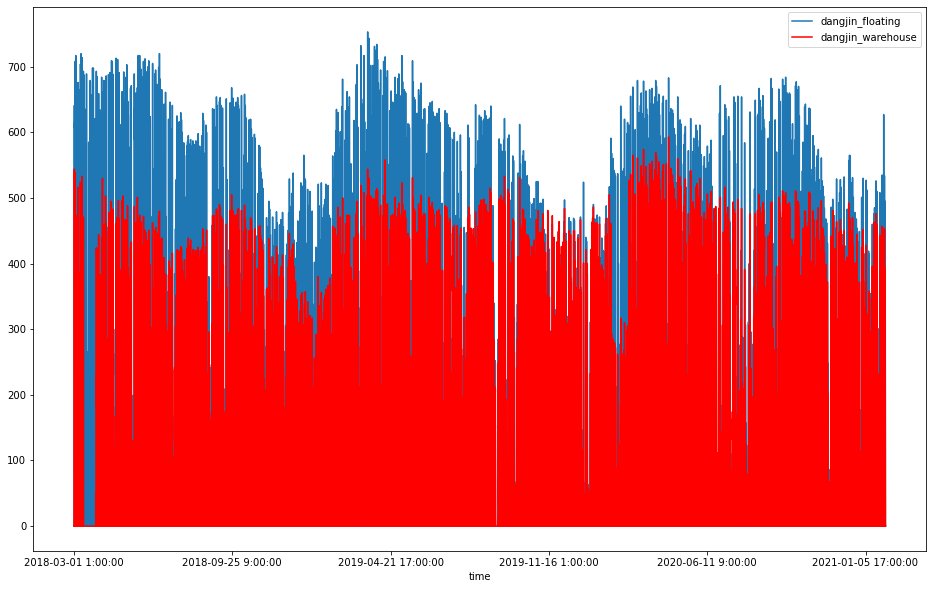

<Figure size 1152x720 with 0 Axes>

In [59]:
import matplotlib.pyplot as plt
ax = plt.gca()
plt.figure(figsize=(16, 10))
energy.plot(kind='line', x='time', y='dangjin_floating', ax=ax, figsize=(16, 10))
energy.plot(kind='line', x='time', y='dangjin_warehouse', ax=ax, figsize=(16, 10), c='r')
plt.show()